# Investment Assignment by Tushar Prasad

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import chardet
import seaborn as sns
import matplotlib.pyplot as plt 

## Reading companies and rounds csvs

In [2]:
## Finding the encoding for rounds2

with open("rounds2.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(2000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
## Finding the encoding for companies

with open("companies.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(2000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


### The encoding is in ascii. Hence, converting the encoding from ISO-8859-1 to ascii

In [4]:
## reading companies dataset

companies = pd.read_csv('companies.csv',encoding='ISO-8859-1')

In [5]:
## Conversion into ascii

companies['permalink'] = companies['permalink'].str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies['name'] = companies['name'].str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

In [6]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [7]:
companies.shape

(66368, 10)

In [8]:
## reading rounds2 dataset

rounds2 = pd.read_csv('rounds2.csv',encoding='ISO-8859-1')

In [9]:
## Conversion into ascii

rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

In [10]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [11]:
rounds2.shape

(114949, 6)

## Data Inspection

In [12]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [13]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Regroup-Therapy,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [14]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [15]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [16]:
## Table 1.1 Q-1

print(rounds2['company_permalink'].value_counts()) ## Since python sees lower case and upper case as different, we will convert them

rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

rounds2['company_permalink'].nunique()

/ORGANIZATION/SOLARFLARE                     10
/ORGANIZATION/ENDOGASTRIC-SOLUTIONS           9
/organization/exagen-diagnostics              9
/organization/solarflare                      9
/organization/tigo-energy                     9
/ORGANIZATION/EXAGEN-DIAGNOSTICS              9
/ORGANIZATION/QUELLAN                         9
/organization/semprius                        9
/organization/quellan                         9
/organization/vocalocity                      9
/ORGANIZATION/SEMPRIUS                        9
/organization/mobivery                        8
/ORGANIZATION/TYRO-PAYMENTS                   8
/organization/tyro-payments                   8
/ORGANIZATION/POWERHOUSE-DYNAMICS             8
/organization/aperto-networks                 8
/ORGANIZATION/TIGO-ENERGY                     8
/ORGANIZATION/MOBIVERY                        8
/organization/terascala                       8
/ORGANIZATION/NEXT-STEP-LIVING                8
/organization/growlife                  

66368

In [17]:
## Table 1.1 Q-2

print(companies['permalink'].value_counts()) ## Since python sees lower case and upper case as different, we will convert them

companies['permalink'] = companies['permalink'].str.lower()

companies['permalink'].nunique()

/Organization/Regroup-Therapy                          1
/Organization/Precision-Therapeutics                   1
/Organization/Applied-Biomimetic                       1
/Organization/Tubular-Labs                             1
/Organization/Thetime                                  1
/Organization/Ipracom                                  1
/Organization/Immaculate-Baking                        1
/Organization/Tesorx-Pharma                            1
/Organization/The-Solution-Design-Group                1
/Organization/Hansa-Customer                           1
/Organization/Screachtv                                1
/Organization/Loxysoft-Group                           1
/Organization/Crossworld-Warranty                      1
/Organization/Taggle-Internet-Ventures-Private         1
/Organization/Allvoices                                1
/Organization/Minubo                                   1
/Organization/Puzl                                     1
/Organization/Transportation-Gr

66368

In [18]:
## Table 1.1 Q-3

#permalink is the answer

In [19]:
## Table 1.1 Q-4 

## Finding the set difference of the unique companies between both the datasets

print(set(rounds2['company_permalink'].unique()).difference(set(companies['permalink'].unique())))

print(set(companies['permalink'].unique()).difference(set(rounds2['company_permalink'].unique())))

## Hence we can see that there is no difference between the companies of round2 and companies file.

set()
set()


In [20]:
## Merging the two dataframes

master_frame = pd.merge(rounds2,companies,left_on='company_permalink',right_on='permalink',how='left')

In [21]:
## Table 1.1 Q-5

master_frame.shape

(114949, 16)

## Data Cleaning

In [22]:
# missing values in master df

master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [23]:
# summing up the missing values (column-wise) and displaying fraction of NaNs

master_frame.isnull().sum()*100/len(master_frame)

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
permalink                   0.000000
name                        0.000870
homepage_url                5.336280
category_list               2.966533
status                      0.000000
country_code                7.549435
state_code                  9.522484
region                      8.844792
city                        8.842182
founded_at                 17.852265
dtype: float64

#### From the initial problem statement, the driving factors for our analysis consist of features like country,  sector and funding type. Hence we can drop the columns which are not required


In [24]:
## Dropping unnecessary columns

dropped_cols = ['funding_round_permalink','funding_round_code','funded_at','permalink','homepage_url','status','state_code','region',
                'city','founded_at']

master_frame.drop(dropped_cols,axis=1,inplace=True)

In [25]:
# rechecking missing values in master df

master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
raised_amount_usd     19990
name                      1
category_list          3410
country_code           8678
dtype: int64

In [26]:
# summing up the missing values (column-wise) and displaying fraction of NaNs

master_frame.isnull().sum()*100/len(master_frame)

company_permalink      0.000000
funding_round_type     0.000000
raised_amount_usd     17.390321
name                   0.000870
category_list          2.966533
country_code           7.549435
dtype: float64

#### We can now drop the null columns are take a call whether it is a good decision or not

In [27]:
master_frame.dropna().shape[0]*100/master_frame.shape[0]

77.01502405414575

#### We are retaining 77% of our information which is a good amount to continue. Hence we can drop the null rows

In [28]:
master_frame = master_frame.dropna()

In [29]:
# rechecking missing values in master df

master_frame.isnull().sum()

company_permalink     0
funding_round_type    0
raised_amount_usd     0
name                  0
category_list         0
country_code          0
dtype: int64

## Funding Type Analysis

In [30]:
master_frame['funding_round_type'].unique() ## We only need to have 'venture','seed','angel' & private_equity for our analysis

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [31]:
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture','seed','angel','private_equity'])]

In [32]:
## checking the unique funding types

master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

In [33]:
## Table 2.1 Q-(1 to 4)

master_frame.groupby(['funding_round_type']).mean().astype(int)

,raised_amount_usd
funding_round_type,
angel,971573
private_equity,73938486
seed,747827
venture,11724222


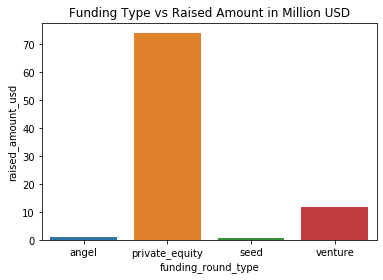

In [34]:
## Creating a plot of Funding Type vs Raised Amount in Million USD

sns.barplot(x=master_frame.groupby(['funding_round_type']).mean().astype(int).index,
            y=master_frame.groupby(['funding_round_type']).mean().astype(int)['raised_amount_usd']/1000000,
           ).set_title("Funding Type vs Raised Amount in Million USD");


### From the graph, we can see that only venture funding type lies within our range of 5 - 15 million US dollar. Hence, we will select venture as our funding type

In [35]:
## Table 2.1 Q-5

## We will select venture as our funding type.

master_frame = master_frame[master_frame['funding_round_type'] == 'venture'] 

master_frame = master_frame.drop(['funding_round_type'], axis = 1)

## Country Analysis

In [36]:
## selecting the top 9 countries on the bases of raised amount usd

top9 = master_frame.groupby('country_code',as_index=False).sum().sort_values(by='raised_amount_usd',ascending=False).iloc[0:9]

In [37]:
## Table 3.1 Q-(1-3)

top9

,country_code,raised_amount_usd
94,USA,4.200680e+11
15,CHN,3.933892e+10
29,GBR,2.007281e+10
39,IND,1.426151e+10
12,CAN,9.482218e+09
28,FRA,7.226851e+09
42,ISR,6.854350e+09
21,DEU,6.306922e+09
45,JPN,3.167647e+09


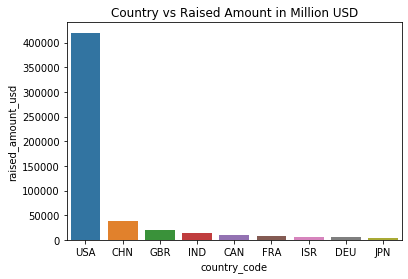

In [38]:
## Creating a bar plot of country vs raised amount in million USD

sns.barplot(x=top9['country_code'],
            y=top9['raised_amount_usd']/1000000,
           ).set_title("Country vs Raised Amount in Million USD");


### China is not an english speaking country as most of the documents and companies communicate in native languages. Hence, the top 3 english speaking countries are USA, GBR and IND

In [39]:
## select the relevant countries

master_frame = master_frame[master_frame['country_code'].isin(['USA','GBR','IND'])]

## Sector Analysis 1

In [40]:
## Filtering primary sectors from the category list

master_frame['primary sector'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])

In [41]:
## Reading the mapping file

mapping = pd.read_csv('mapping.csv')

mapping = mapping.dropna()

mapping.drop(['Blanks'],inplace=True,axis=1)

In [42]:
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [43]:
## Data manipulation of the mapping file into a format which can be merged into our master df

id_vars = ['category_list']
value_vars = list(np.setdiff1d(mapping.columns, id_vars))

mapping = pd.melt(mapping, id_vars = id_vars, value_vars = value_vars) 

mapping = mapping[mapping['value']==1]

mapping.drop(['value'],axis=1,inplace=True)

mapping.rename(columns={'category_list':'primary sector','variable':'main_sectors'},inplace=True)

In [44]:
## merging the data

master_frame = pd.merge(master_frame,mapping,on='primary sector',how='left')

In [45]:
master_frame[master_frame['main_sectors'].isnull()]['primary sector'].unique()

array(['Analytics', 'Finance', 'Nanotechnology', 'Business Analytics',
       'Contact Management', 'Financial Services', 'Career Management',
       'Cloud Management', 'Big Data Analytics', 'Finance Technology',
       'Document Management', 'Digital Signage', 'Journalism',
       'Waste Management', 'Energy Management', 'Lead Management',
       'Event Management', 'IT Management', 'Cannabis',
       'Investment Management', 'Knowledge Management',
       'Identity Management', 'Personalization', 'Natural Gas Uses',
       'Alternative Medicine', 'Natural Language Processing',
       'Intellectual Asset Management', 'Risk Management',
       'Adaptive Equipment', 'Supply Chain Management',
       'Innovation Management', 'Project Management', 'Racing',
       'Specialty Retail', 'Biotechnology and Semiconductor',
       'Educational Games', 'Rapidly Expanding',
       'Digital Rights Management', 'Governance', 'Professional Services',
       'Mobile Analytics', 'Navigation', 'Produc

In [46]:
## Dropping the rows having no main sector associated with the primary sector

master_frame = master_frame[master_frame['main_sectors'].notnull()]

In [47]:
## Checking the unique main sectors

master_frame['main_sectors'].unique()

array(['Entertainment', 'News, Search and Messaging', 'Others', 'Health',
       'Cleantech / Semiconductors', 'Manufacturing',
       'Social, Finance, Analytics, Advertising', 'Automotive & Sports'],
      dtype=object)

## Sector Analysis 2

In [48]:
## Filtering the data according to the relevant countries and the investment constraints

D1 = master_frame.loc[(master_frame['country_code']=='USA')&(master_frame['raised_amount_usd']>=5000000)&(master_frame['raised_amount_usd']<=15000000)]

D2 = master_frame.loc[(master_frame['country_code']=='GBR')&(master_frame['raised_amount_usd']>=5000000)&(master_frame['raised_amount_usd']<=15000000)]

D3 = master_frame.loc[(master_frame['country_code']=='IND')&(master_frame['raised_amount_usd']>=5000000)&(master_frame['raised_amount_usd']<=15000000)]

In [49]:
## Table 5.1 Q-1

print(D1.shape[0])
print(D2.shape[0])
print(D3.shape[0])

11149
577
299


In [50]:
## Table 5.1 Q-2

print(D1['raised_amount_usd'].sum())
print(D2['raised_amount_usd'].sum())
print(D3['raised_amount_usd'].sum())

99661524549.0
5028704358.0
2683537552.0


In [51]:
## Table 5.1 Q-(3-8)

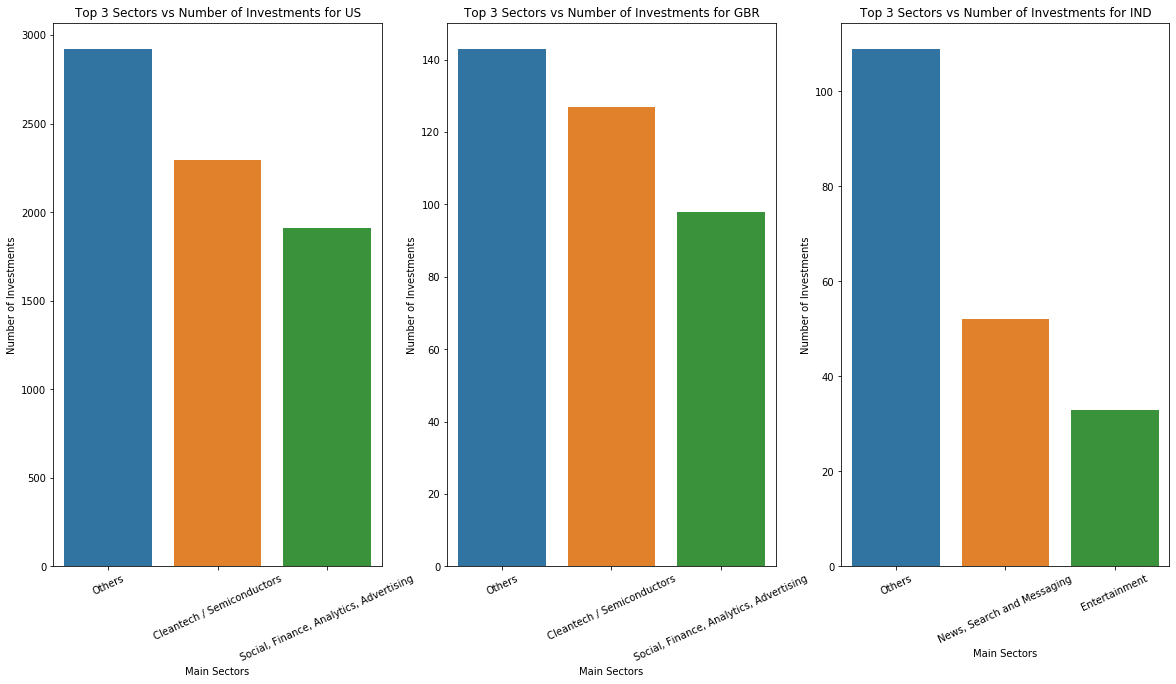

In [52]:
## A plot showing the number of investments in the top 3 sectors of the top 3 countries

plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.barplot(x = D1.groupby(['main_sectors']).count()[['company_permalink']].sort_values('company_permalink',ascending=False).iloc[0:3].index,
            y = D1.groupby(['main_sectors']).count()[['company_permalink']].sort_values('company_permalink',ascending=False).iloc[0:3]['company_permalink'])

plt.xlabel('Main Sectors')
plt.ylabel('Number of Investments')
plt.title('Top 3 Sectors vs Number of Investments for US')
plt.xticks(rotation=25)


plt.subplot(1,3,2)
sns.barplot(x = D2.groupby(['main_sectors']).count()[['company_permalink']].sort_values('company_permalink',ascending=False).iloc[0:3].index,
            y = D2.groupby(['main_sectors']).count()[['company_permalink']].sort_values('company_permalink',ascending=False).iloc[0:3]['company_permalink'])

plt.xlabel('Main Sectors')
plt.ylabel('Number of Investments')
plt.title('Top 3 Sectors vs Number of Investments for GBR')
plt.xticks(rotation=25)

plt.subplot(1,3,3)
sns.barplot(x = D3.groupby(['main_sectors']).count()[['company_permalink']].sort_values('company_permalink',ascending=False).iloc[0:3].index,
            y = D3.groupby(['main_sectors']).count()[['company_permalink']].sort_values('company_permalink',ascending=False).iloc[0:3]['company_permalink'])

plt.xlabel('Main Sectors')
plt.ylabel('Number of Investments')
plt.title('Top 3 Sectors vs Number of Investments for IND')
plt.xticks(rotation=25)

plt.show()


In [53]:
D1.groupby(['main_sectors']).count()[['company_permalink']].sort_values('company_permalink',ascending=False)

,company_permalink
main_sectors,
Others,2923
Cleantech / Semiconductors,2297
"Social, Finance, Analytics, Advertising",1912
"News, Search and Messaging",1563
Health,908
Manufacturing,799
Entertainment,580
Automotive & Sports,167


In [54]:
D2.groupby(['main_sectors']).count()[['company_permalink']].sort_values('company_permalink',ascending=False)

,company_permalink
main_sectors,
Others,143
Cleantech / Semiconductors,127
"Social, Finance, Analytics, Advertising",98
"News, Search and Messaging",73
Entertainment,54
Manufacturing,42
Health,24
Automotive & Sports,16


In [55]:
D3.groupby(['main_sectors']).count()[['company_permalink']].sort_values('company_permalink',ascending=False)

,company_permalink
main_sectors,
Others,109
"News, Search and Messaging",52
Entertainment,33
"Social, Finance, Analytics, Advertising",32
Manufacturing,21
Cleantech / Semiconductors,20
Health,19
Automotive & Sports,13


In [57]:
## Table 5.1 Q-9

print(D1[D1['main_sectors']=='Others'].groupby(['name']).sum().sort_values('raised_amount_usd',ascending=False).iloc[0])

print(D2[D2['main_sectors']=='Others'].groupby(['name']).sum().sort_values('raised_amount_usd',ascending=False).iloc[0])

print(D3[D3['main_sectors']=='Others'].groupby(['name']).sum().sort_values('raised_amount_usd',ascending=False).iloc[0])

raised_amount_usd    64300000.0
Name: Virtustream, dtype: float64
raised_amount_usd    37000000.0
Name: Electric Cloud, dtype: float64
raised_amount_usd    39000000.0
Name: FirstCry.com, dtype: float64


In [58]:
## Table 5.1 Q-10

print(D1[D1['main_sectors']=='Cleantech / Semiconductors'].groupby(['name']).sum().sort_values('raised_amount_usd',ascending=False).iloc[0])

print(D2[D2['main_sectors']=='Cleantech / Semiconductors'].groupby(['name']).sum().sort_values('raised_amount_usd',ascending=False).iloc[0])

print(D3[D3['main_sectors']=='News, Search and Messaging'].groupby(['name']).sum().sort_values('raised_amount_usd',ascending=False).iloc[0])

raised_amount_usd    75300000.0
Name: Biodesix, dtype: float64
raised_amount_usd    35600000.0
Name: EUSA Pharma, dtype: float64
raised_amount_usd    33000000.0
Name: GupShup, dtype: float64


## Results

#### Based on the data analysis , SparksFunds should invest in -

- Funding type - Venture.
- Countries - USA, Britain and India, respectively.
- Sectors - "Others", "Cleantech / Semiconductors", "Social, Finance, Analytics, Advertising" for US and Britain, "Others","News, Search and Messaging","Entertainment" for India

